<a href="https://colab.research.google.com/github/AlexVonSchwerdtner/BA890-Predicting-Hotel-Review-Ratings/blob/main/BA890_Research_Project_AvS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<marquee style='width: 40%; color: blue;'><b>Welcome to exploring Hotel Reviews and predicting Review Ratings!</b></marquee>

# **BA890 - Research Project**
## Alexander von Schwerdtner

<img src="https://github.com/AlexVonSchwerdtner/BA890-Predicting-Hotel-Review-Ratings/blob/main/Image_Blog_tripadvisor.png?raw=true" width="800" align="center"/>



** Image from [Review Pro](https://www.reviewpro.com/blog/boost-hotel-review-collection-program/)*

---
# **Hotel Review Rating Prediction**
---

### *Executive Summary*
Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor...

### *Problem definition:*

> **How can Hotel Reviews be categorized to create a prediction model on hotel guest reviews for online travel companies like TripAdvisor or Yelp.**

I would like to use deep learning techniques and AI to automate the predictiion of Hotel Review Ratings by creating a neural network algorithm and machine learning models to classify different hotel reviews on TripAdvisor. 

## **Data**

The Data was downloaded from [Zenodo]('https://zenodo.org/record/1219899#.Yjo_fRDMIq0')

### **Basic information of Datasets used**:

*TripAdvisor Hotel Review Dataset*
* 20,491 reviews


Each row represents a Hotel Review including: 

* **Review**: The Hotel Review from a Guest
* **Rating**: The Rating on a scale of 1-5

## Citation
Alam, M. H., Ryu, W.-J., Lee, S., 2016. Joint multi-grain topic sentiment: modeling semantic aspects for online reviews. Information Sciences 339, 206–223. DOI




## Content
---

1.  **Importing Libraries**
2.  **Setup, Data Cleaning & Data Pre-Processing**
3.  **Exploratory Data Analysis**
4.   **Neural Network Machine Learning**
5.   **Limitation & Future Steps**
---




# **1. Import libraries**

In [ ]:
# Importing all necessary libraries and imports

# Basics
import numpy as np
import pandas as pd
import re
import string
import nltk
from numpy import array
from numpy import asarray
from numpy import zeros

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning libraries
from tensorflow import keras
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model

# NLTK 
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# LIME
try:
  import lime
  from lime.lime_text import LimeTextExplainer
except ImportError as error:
  !pip install lime
  import lime
  from lime.lime_text import LimeTextExplainer

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# **2. Setup, Data Cleaning & Pre-Processing**

In [ ]:
# Dataset is now stored in a Pandas Dataframe
url = 'https://raw.githubusercontent.com/AlexVonSchwerdtner/BA890-Predicting-Hotel-Review-Ratings/main/tripadvisor_hotel_reviews.csv'
trip_advisor_reviews = pd.read_csv(url)

# trip_advisor_reviews = pd.read_csv('gdrive/My Drive/MSBA/BA890 - Analytical Project/tripadvisor_hotel_reviews.csv')

In [ ]:
# having a look at the data
trip_advisor_reviews.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [ ]:
# having a look at the data
trip_advisor_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


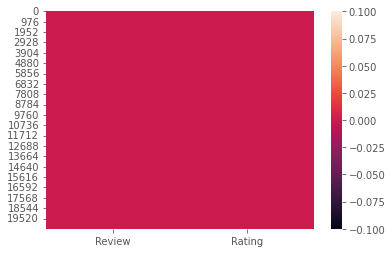

In [ ]:
# checking for missing values
sns.heatmap(trip_advisor_reviews.isnull())

### *2.2.1 Text Cleaning Function*

In [ ]:
# defining a cleaning function for text
def review_cleaning(text):
    '''making text lowercase, removing text in square brackets,
    removiing all links, removing punctuation and removing words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

Applying the text cleaning function

In [ ]:
# applying the cleaning function to the content, title and text columns
trip_advisor_reviews['Review'] = trip_advisor_reviews['Review'].apply(lambda x: review_cleaning(x))

trip_advisor_reviews.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not  experience hotel monaco seattl...       3
3  unique great stay wonderful time hotel monaco ...       5
4  great stay great stay went seahawk game awesom...       5

### *2.2.2 Stop words*

To save processing time we will remove all stop words from the reviews using the nltk library.

In [ ]:
# downloading stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# removing english stopwords to save space and processing time
stop = stopwords.words('english')

trip_advisor_reviews['Review'] = trip_advisor_reviews['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
trip_advisor_reviews.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms experience hotel monaco seattle goo...       3
3  unique great stay wonderful time hotel monaco ...       5
4  great stay great stay went seahawk game awesom...       5

In [ ]:
trip_advisor_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


## *2.3 Splitting data into Sentiment Groups by Rating*


*   **Positive** Sentiment: 2 (Ratings 4,5)
*   **Neutral** Sentiment: 1 (Ratings 3)
*   **Negative** Sentiment: 0 (Ratings 1,2)



In [ ]:
# Considering a score of 2 or less will to be a negative review, 3 will be considered neutral and greater than 3 as a positive reviews=
trip_advisor_reviews['Sentiment'] = trip_advisor_reviews['Rating'].apply(lambda x: 2 if x > 3 else 1 if x == 3 else 0)

In [ ]:
trip_advisor_reviews.sample(10)

Review  Rating  Sentiment
14800  hotel andrea hotel florence italydate lynne po...       5          2
10155  outstanding hotel price stayed june based revi...       5          2
14606  excellent choice excellent stay affinia dumont...       5          2
2586   repeat visitor pleased family people including...       4          2
17652  probably best hotel stayed booked hotel husban...       5          2
14     great hotel night quick business trip loved li...       4          2
6502   nice stay recently stayed downtown seattle laq...       4          2
12641  star stayed punta cana beautiful place vacatio...       3          1
7931   absolutely faboulous frien stayed omni long we...       5          2
10477  difference hotel located quiet street min walk...       5          2

## 2.4 Shuffling data

In [ ]:
# shuffling the pre-processed dataset
trip_advisor_reviews = trip_advisor_reviews.sample(frac=1).reset_index(drop=True)

In [ ]:
trip_advisor_reviews.head(10)

Review  Rating  Sentiment
0  impressed hotel mela excellent location w stre...       5          2
1  enjoyable reading reviews website regarding re...       4          2
2  stay away checked ritz carlton new orleans exp...       2          0
3  great hotel wife stayed overnight fri jan prio...       5          2
4  loved took quick trip mr stayed night ca nt sa...       5          2
5  ok hotel people nice property location central...       3          1
6  friendly hotel stayed jurys boston nights chos...       5          2
7  excellent location hotel busy work hear anythi...       3          1
8  nice business hotel wonderful stay business tr...       4          2
9  casablanca stay sam stayed hotel october excel...       5          2

# **3. Exploratory Data Analysis**

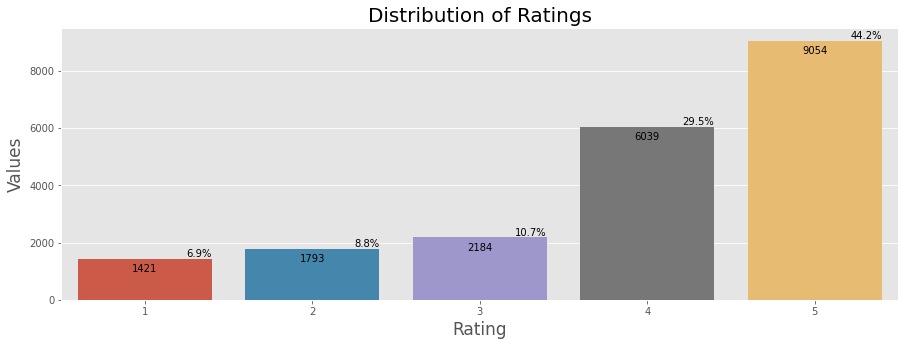

In [ ]:
# Graphing the distribution of the Review Ratings
total = float(len(trip_advisor_reviews))


x1 = plt.figure(figsize = (15,5))

fig = sns.countplot(x='Rating', data= trip_advisor_reviews)
fig.set_title('Distribution of Ratings', fontsize=20)
fig.set_ylabel("Values", fontsize=17)
fig.set_xlabel("Rating", fontsize=17)
for p in fig.patches:
    fig.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    fig.annotate(percentage, (x, y),ha='right', va='bottom')

In [ ]:
# looking at the descriptive statistics of the review ratings overall
trip_advisor_reviews.describe()

Rating     Sentiment
count  20491.000000  20491.000000
mean       3.952223      1.579718
std        1.233030      0.746573
min        1.000000      0.000000
25%        3.000000      1.000000
50%        4.000000      2.000000
75%        5.000000      2.000000
max        5.000000      2.000000

Finding that the mean is 3.95/5 meaning that the average review is slightly positive.

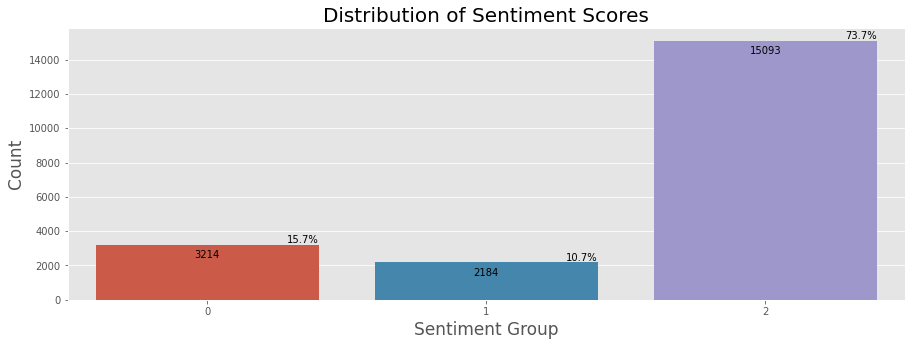

In [ ]:
# Graphing the distribution of the Review Ratings
total = float(len(trip_advisor_reviews))


x1 = plt.figure(figsize = (15,5))

fig = sns.barplot(x=trip_advisor_reviews.Sentiment.value_counts().index,
                  y=trip_advisor_reviews.Sentiment.value_counts().tolist(), 
                  data= trip_advisor_reviews)
fig.set_title('Distribution of Sentiment Scores', fontsize=20)
fig.set_ylabel("Count", fontsize=17)
fig.set_xlabel("Sentiment Group", fontsize=17)
for p in fig.patches:
    fig.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    fig.annotate(percentage, (x, y),ha='right', va='bottom')

In [ ]:
# splitting reviews into three buckets: 2: positive, 1: neutral,0: negative]
trip_advisor_reviews_positive = trip_advisor_reviews[trip_advisor_reviews['Sentiment']==2]
trip_advisor_reviews_neutral = trip_advisor_reviews[trip_advisor_reviews['Sentiment']==1]
trip_advisor_reviews_negative = trip_advisor_reviews[trip_advisor_reviews['Sentiment']==0]

### Exploration of *Positive Sentiment*

Text(0.5, 1.0, 'Reviews Positive')

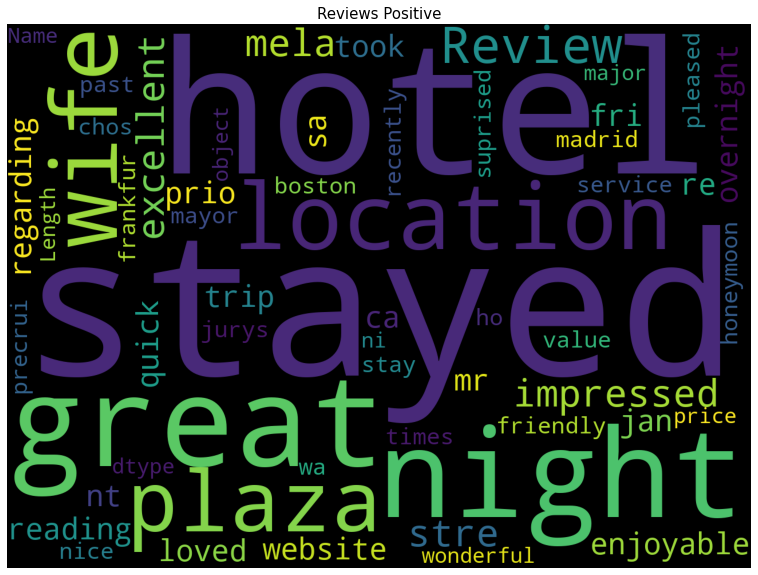

In [ ]:
# word cloud for the Positive Reviews (Rating > 3)
cloud = WordCloud(width=1300, height=950).generate(str(trip_advisor_reviews_positive['Review']))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title('Reviews Positive', fontsize = 15)

### Exploration of *Neutral Sentiment*

Text(0.5, 1.0, 'Reviews Neutral')

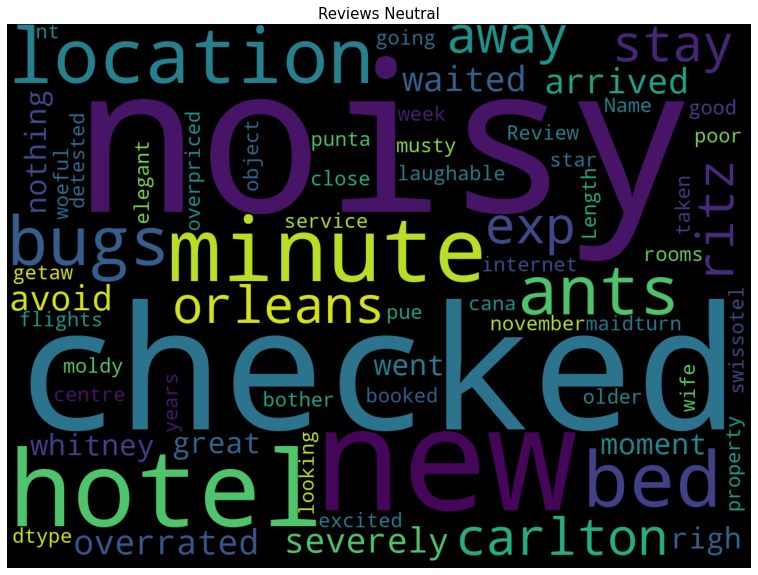

In [ ]:
# word cloud for the Neutral Reviews (Rating == 3)
cloud = WordCloud(width=1300, height=950).generate(str(trip_advisor_reviews_negative['Review']))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title('Reviews Neutral', fontsize = 15)

### Exploration of *Negative Sentiment*

Text(0.5, 1.0, 'Reviews Positive')

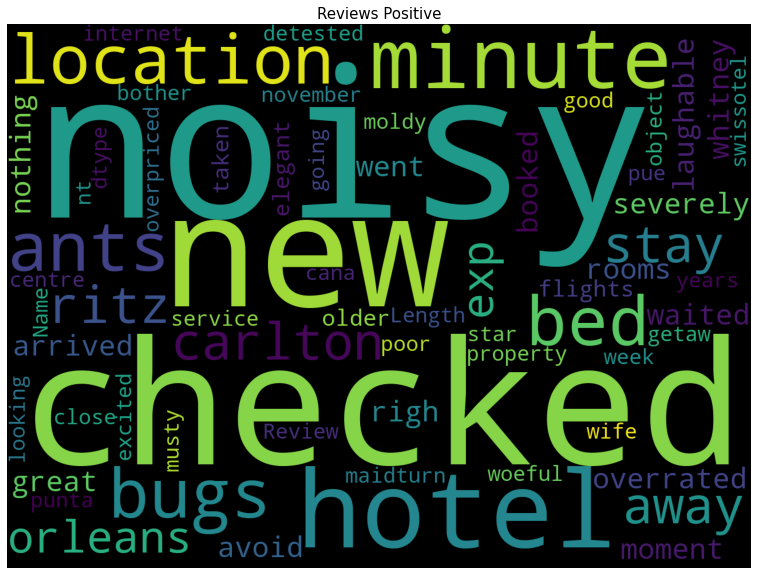

In [ ]:
# word cloud for the Negative Reviews (Rating <= 2)
cloud = WordCloud(width=1300, height=950).generate(str(trip_advisor_reviews_negative['Review']))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title('Reviews Positive', fontsize = 15)

# **4. Neural Network Machine Learning**

Preparing the Data for the Model

In [ ]:
# Defining label and variables and converting them to numpy
text = trip_advisor_reviews['Review'].to_numpy()
label = trip_advisor_reviews['Sentiment'].to_numpy()

In [ ]:
text_vectorization = keras.layers.TextVectorization(
    max_tokens=2000, 
    output_mode="int", # This is requesting integer encodings (which means we'll have a sequence of integers),
    #output_sequence_length=700 # Up to the first 600 words.
)

text_vectorization.adapt(text)

process_text = text_vectorization(text)

Just to see what this layer is doing to the Reviews... 

In [ ]:
review_text = text[0]
print(f'REVIEW TEXT: \n\n{review_text}')
review_len = len(review_text.split(' '))
print(f'REVIEW DETAILS: \n\nThe review contains roughly {review_len} words (based on white spaces).')
vectorized_review = text_vectorization(text)
print(f'It\'s vectorized (and padded) form contains {vectorized_review.shape[1]} tokens.\n') #Including the start index.
print(f'VECTOR REPRESENTATION:\n')
vectorized_review[0] # This text vectorization layer will convert a raw text vector into a sequence of integers.

REVIEW TEXT: 

impressed hotel mela excellent location w street hotel clean hallways smell nice sleeping great bed excellent comfort rooms bath rooms good size especially deluxe king bed brand new tastefully arm chair desk chair room able use laptop watching plasma tv enroll desires program select free drink snack orchids fitness center management staff helpful wonderful large group ladies hotel staff took good care ball male employees good looking courteous ai nt inconsequential felt good staffers extreme interpersonal intelligence eat restaurant opensms v
REVIEW DETAILS: 

The review contains roughly 81 words (based on white spaces).
It's vectorized (and padded) form contains 1847 tokens.

VECTOR REPRESENTATION:



<tf.Tensor: shape=(1847,), dtype=int64, numpy=array([440,   2,   1, ...,   0,   0,   0])>

**Checking for average length of each Review**

Checking the ratio of observations in training to mean number of tokens per sample. We don't expect to get much value at all from a sequential text model in this case, because we would need a much bigger dataset.

In [ ]:
lengths = [len(x) for x in text]

print(f'The average Review in our data has {np.mean(lengths)} words, and we have {len(trip_advisor_reviews)} samples.')
print(f'The ratio of samples to average sample length is thus {len(trip_advisor_reviews)/np.mean(lengths)}. We are nowhere close to 1500.')

The average Review in our data has 679.7885901127324 words, and we have 20491 samples.
The ratio of samples to average sample length is thus 30.14319495506961. We are nowhere close to 1500.


In [ ]:
# Checking how much of the data to take out for the testing dataset (validation)
holdout_split = int(len(label)*0.20)

In [ ]:
# defining train and test data
data_train = process_text[:holdout_split]
labels_train = label[:holdout_split]
data_test = process_text[holdout_split:]
labels_test = label[holdout_split:]

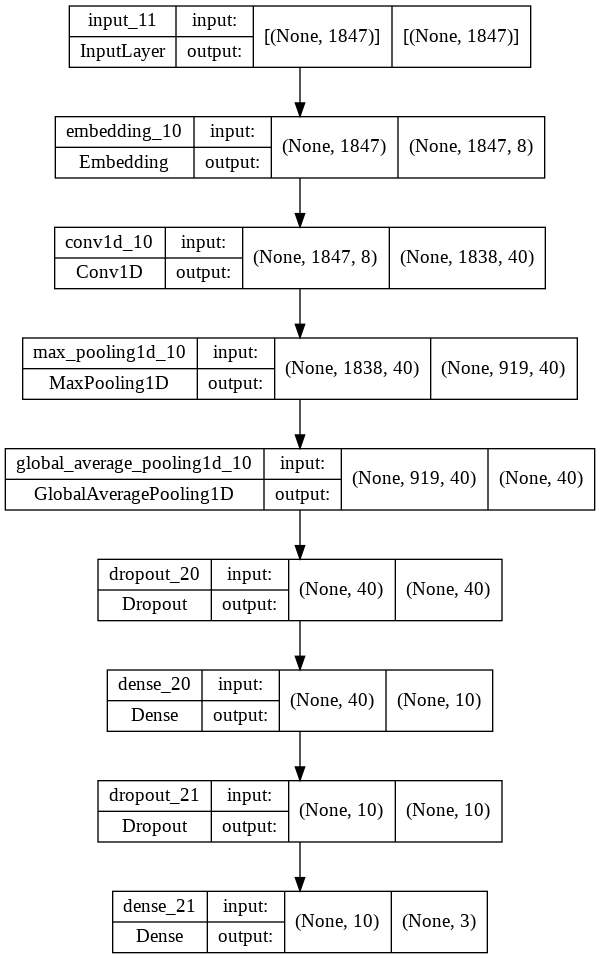

In [ ]:
def build_model():
    
    input = keras.Input(shape=(data_train.shape[1]))
    x = layers.Embedding(input_dim=2000,output_dim=8,input_length=784, mask_zero=True)(input)
    x = layers.Conv1D(filters=40,kernel_size=10,activation="relu")(x)
    x = layers.MaxPool1D(pool_size=2,strides=2)(x)
    x = layers.GlobalAveragePooling1D()(x) 
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(10,activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(3, activation="softmax")(x)

    model = keras.Model(inputs=input,outputs=output)

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    return model

model = build_model()

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="DenseNet_for_LIME.keras",
        save_best_only=True,
        monitor="val_loss")
]

keras.utils.plot_model(model,show_shapes=True)

To train the model right, let's cross validate... 

In [ ]:
k = 5
num_validation_samples = len(data_train) // k
num_epochs = 9
batch_sizes = 4
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
   
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    
    model = build_model()
    
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/9
820/820 [==============================] - 9s 10ms/step - loss: 0.7972 - accuracy: 0.7261 - val_loss: 0.6676 - val_accuracy: 0.7521
Epoch 2/9
820/820 [==============================] - 8s 10ms/step - loss: 0.6818 - accuracy: 0.7530 - val_loss: 0.5783 - val_accuracy: 0.7973
Epoch 3/9
820/820 [==============================] - 8s 10ms/step - loss: 0.5948 - accuracy: 0.7890 - val_loss: 0.5161 - val_accuracy: 0.8132
Epoch 4/9
820/820 [==============================] - 8s 10ms/step - loss: 0.5229 - accuracy: 0.8188 - val_loss: 0.5853 - val_accuracy: 0.8071
Epoch 5/9
820/820 [==============================] - 8s 10ms/step - loss: 0.4582 - accuracy: 0.8381 - val_loss: 0.4430 - val_accuracy: 0.8425
Epoch 6/9
820/820 [==============================] - 8s 10ms/step - loss: 0.4059 - accuracy: 0.8469 - val_loss: 0.4391 - val_accuracy: 0.8425
Epoch 7/9
820/820 [==============================] - 8s 10ms/step - loss: 0.3720 - accuracy: 0.8576 - val_loss: 0.4492 - val_accuracy: 0.8303
Epoch 

Plotting average loss over training... 

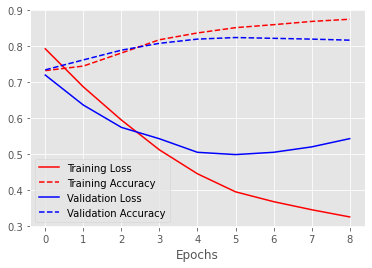

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

Evaluating performance on the holdout data

In [ ]:
model = build_model()
model.fit(data_train,labels_train,epochs=5,batch_size=4)

test_acc = model.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/5
1025/1025 [==============================] - 10s 9ms/step - loss: 0.7772 - accuracy: 0.7340
Epoch 2/5
1025/1025 [==============================] - 10s 9ms/step - loss: 0.6515 - accuracy: 0.7340
Epoch 3/5
1025/1025 [==============================] - 10s 9ms/step - loss: 0.5448 - accuracy: 0.7950
Epoch 4/5
1025/1025 [==============================] - 10s 10ms/step - loss: 0.4509 - accuracy: 0.8411
Epoch 5/5
513/513 [==============================] - 3s 6ms/step - loss: 0.4576 - accuracy: 0.8340
The resulting model is about 83.40% accurate in the holdout sample.


Creating our LIME Explainer to Understand Text Tokens' Effects in our Classifier

In [ ]:
# Defining the Lime Explainer
class_names=['Positive','Negative']
explainer = LimeTextExplainer(class_names=class_names,)

def new_predict(text):
  vectorized = text_vectorization(text)
  padded = keras.preprocessing.sequence.pad_sequences(vectorized, maxlen=data_train.shape[1],padding='post')
  pred = model.predict(padded)
  pos_neg_preds = []
  for i in pred:
    temp=i[0]
    pos_neg_preds.append(np.array([1-temp,temp])) #I would recommend rounding temp and 1-temp off to 2 places
  return np.array(pos_neg_preds)

And, now we can call our LIME explainer on any given review... 

In [ ]:
# Taking a random sample of the positive reviews to explain it with LIME
sample = trip_advisor_reviews_positive.sample(1)
test_obs = sample.index
test_obs[0]

12998

In [ ]:
# Finding an observation that was classified as Positive
test_obs = test_obs[0]

if label[test_obs]==2:
  print(f'The ground truth label for this observation is "positive."')
elif label[test_obs]==1:
  print(f'The ground truth label for this observation is "neutral."')
else:
  print(f'The ground truth label for this observation is "negative."')

explainer.explain_instance(trip_advisor_reviews['Review'][test_obs],new_predict).show_in_notebook(text=True)

The ground truth label for this observation is "positive."


In [ ]:
# Taking a random sample of the Neutral reviews to explain it with LIME
sample = trip_advisor_reviews_neutral.sample(1)
test_obs = sample.index
test_obs[0]

19624

In [ ]:
# Finding an observation that was classified as Neutral
test_obs = test_obs[0]

if label[test_obs]==2:
  print(f'The ground truth label for this observation is "positive."')
elif label[test_obs]==1:
  print(f'The ground truth label for this observation is "neutral."')
else:
  print(f'The ground truth label for this observation is "negative."')

explainer.explain_instance(trip_advisor_reviews['Review'][test_obs],new_predict).show_in_notebook(text=True)

The ground truth label for this observation is "neutral."


In [ ]:
# Taking a random sample of the Negative reviews to explain it with LIME
sample = trip_advisor_reviews_negative.sample(1)
test_obs = sample.index
test_obs[0]

3390

In [ ]:
# Finding an observation that was classified as Negative
test_obs = test_obs[0]

if label[test_obs]==2:
  print(f'The ground truth label for this observation is "positive."')
elif label[test_obs]==1:
  print(f'The ground truth label for this observation is "neutral."')
else:
  print(f'The ground truth label for this observation is "negative."')

explainer.explain_instance(trip_advisor_reviews['Review'][test_obs],new_predict).show_in_notebook(text=True)

The ground truth label for this observation is "negative."


# **5. Limitations & Future Steps**

Overall I was able to create a Neural Network Model with a Multi-Class Classification for **Positive, Neutral & Negative** Reviews. I achieved an accuracy of about 83.4% on the test data after perfomring a 5-fold cross validation.

***Limitations:***

1.   Data could be biased
2.   Amount of data
3.   Uneven distribution for the Sentiment Groups
4.   Text Vectorization Approach


***Future Steps:***

1.  Trying out Pre-Trained Models to imporve accuracy
2.  Trying out different Text Vectorization Methods
3.  Using GridSearchCV for Hyper-Parameter Tuning

Looking at the distribution of observations in the three classification Sentiment Groups I found that the majority (about 73%) are positive Reviews. To mitigate this uneven distribution I created a model that had an even sample size across the three groups receiving an accuracy of only 63.81% as the data used for this model was significantly smaller than the orignal Data.

# **6. Appendix: Model with equal sized Sentiment Groups**

In [ ]:
x1 = trip_advisor_reviews_positive.sample(2184)
x2 = trip_advisor_reviews_neutral.sample(2184)
x3 = trip_advisor_reviews_negative.sample(2184)

# Stack the DataFrames on top of each other
trip_advisor_reviews_equal =  pd.concat([x1, x2, x3], axis=0)
trip_advisor_reviews_equal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6552 entries, 5005 to 3256
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     6552 non-null   object
 1   Rating     6552 non-null   int64 
 2   Sentiment  6552 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 204.8+ KB


In [ ]:
# shuffling the pre-processed dataset
trip_advisor_reviews_equal = trip_advisor_reviews_equal.sample(frac=1).reset_index(drop=True)

In [ ]:
# Defining label and variables and converting them to numpy
text = trip_advisor_reviews_equal['Review'].to_numpy()
label = trip_advisor_reviews_equal['Sentiment'].to_numpy()

In [ ]:
text_vectorization = keras.layers.TextVectorization(
    max_tokens=2000, 
    output_mode="int", # This is requesting integer encodings (which means we'll have a sequence of integers),
    #output_sequence_length=700 # Up to the first 600 words.
)

text_vectorization.adapt(text)

process_text = text_vectorization(text)

In [ ]:
# Checking how much of the data to take out for the testing dataset (validation)
holdout_split = int(len(label)*0.20)

In [ ]:
# defining train and test data
data_train = process_text[:holdout_split]
labels_train = label[:holdout_split]
data_test = process_text[holdout_split:]
labels_test = label[holdout_split:]

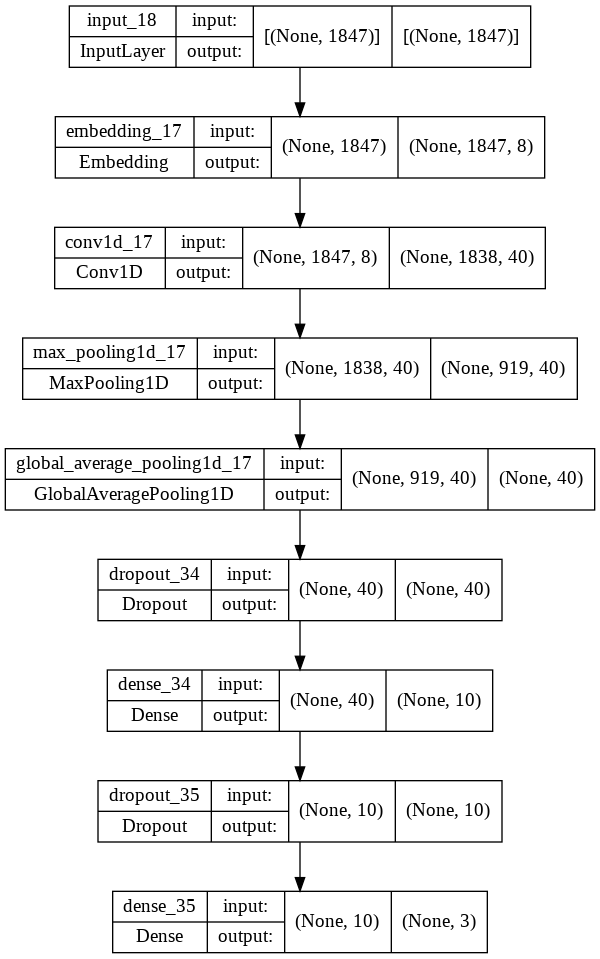

In [ ]:
def build_model():
    
    input = keras.Input(shape=(data_train.shape[1]))
    x = layers.Embedding(input_dim=2000,output_dim=8,input_length=1000, mask_zero=True)(input)
    x = layers.Conv1D(filters=40,kernel_size=10,activation="relu")(x)
    x = layers.MaxPool1D(pool_size=2,strides=2)(x)
    x = layers.GlobalAveragePooling1D()(x) 
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(10,activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(3, activation="softmax")(x)

    model = keras.Model(inputs=input,outputs=output)

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    return model

model = build_model()

#keras.utils.plot_model(model,show_shapes=True)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="DenseNet_for_LIME.keras",
        save_best_only=True,
        monitor="val_loss")
]

keras.utils.plot_model(model,show_shapes=True)

To train the model right, let's cross validate... 

In [ ]:
k = 5
num_validation_samples = len(data_train) // k
num_epochs = 9
batch_sizes = 4
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
   
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    
    model = build_model()
    
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/9
262/262 [==============================] - 3s 9ms/step - loss: 1.0983 - accuracy: 0.3635 - val_loss: 1.0966 - val_accuracy: 0.3397
Epoch 2/9
262/262 [==============================] - 2s 9ms/step - loss: 1.0910 - accuracy: 0.3635 - val_loss: 1.0758 - val_accuracy: 0.5076
Epoch 3/9
262/262 [==============================] - 2s 9ms/step - loss: 1.0044 - accuracy: 0.5191 - val_loss: 0.9665 - val_accuracy: 0.5878
Epoch 4/9
262/262 [==============================] - 2s 8ms/step - loss: 0.8138 - accuracy: 0.6489 - val_loss: 0.8370 - val_accuracy: 0.6336
Epoch 5/9
262/262 [==============================] - 2s 9ms/step - loss: 0.6953 - accuracy: 0.6908 - val_loss: 0.7991 - val_accuracy: 0.6412
Epoch 6/9
262/262 [==============================] - 2s 9ms/step - loss: 0.6272 - accuracy: 0.7233 - val_loss: 0.7906 - val_accuracy: 0.6679
Epoch 7/9
262/262 [==============================] - 2s 8ms/step - loss: 0.5398 - accuracy: 0.7672 - val_loss: 1.0195 - val_accuracy: 0.5496
Epoch 8/9
262

Plotting average loss over training... 

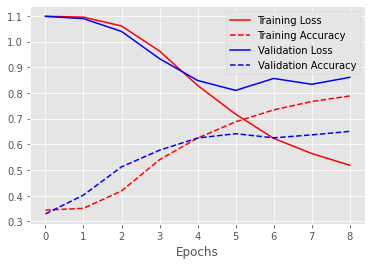

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

Evaluating performance on the holdout data

In [ ]:
model = build_model()
model.fit(data_train,labels_train,epochs=5,batch_size=4)

test_acc = model.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/5
328/328 [==============================] - 4s 9ms/step - loss: 1.0979 - accuracy: 0.3473
Epoch 2/5
328/328 [==============================] - 3s 9ms/step - loss: 1.0820 - accuracy: 0.3786
Epoch 3/5
328/328 [==============================] - 3s 9ms/step - loss: 0.9955 - accuracy: 0.5023
Epoch 4/5
328/328 [==============================] - 3s 9ms/step - loss: 0.8170 - accuracy: 0.6366
Epoch 5/5
164/164 [==============================] - 1s 6ms/step - loss: 0.7858 - accuracy: 0.6381
The resulting model is about 63.81% accurate in the holdout sample.
